In [1]:
import os
os.environ['PATH'] += ':ffmpeg-3.4.2-64bit-static'

# Setup

In [2]:
exp_directory = 'results'
agent_name = 'DeepQAgent'
game_name = 'Pong'
render_mode='rgb_array'

### Global Modules

In [3]:
import os
import datetime
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from gym.wrappers import Monitor

### Local Modules

In [4]:
import base
from src.agents import DeepQAgent, A3CAgent
from src.util import BaseCallback, JupyterCallback
from src.environment.atari import build_atari_environment

/usr/local/anaconda5/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/usr/local/anaconda5/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


## Constants

In [5]:
agents = {
    DeepQAgent.__name__: DeepQAgent,
    A3CAgent.__name__: A3CAgent,
}

#### Output Directory

In [6]:
# setup the experiment directory
now = datetime.datetime.today().strftime('%Y-%m-%d_%H-%M')
exp_directory = '{}/{}/{}/{}'.format(exp_directory, game_name, agent_name, now)
if not os.path.exists(exp_directory):
    os.makedirs(exp_directory)
exp_directory

'results/Pong/DeepQAgent/2018-04-16_01-56'

In [7]:
plot_dir = '{}/plots'.format(exp_directory)
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)
plot_dir

'results/Pong/DeepQAgent/2018-04-16_01-56/plots'

# Environment

In [8]:
env = build_atari_environment(game_name)
env = Monitor(env, '{}/monitor'.format(exp_directory), force=True)

In [9]:
env.observation_space

Box(84, 84, 4)

In [10]:
env.action_space

Discrete(6)

# Agent

In [11]:
agent = agents[agent_name](env, render_mode=render_mode)
agent

DeepQAgent(
    env=<Monitor<FrameStackEnv<ClipRewardEnv<PenalizeDeathEnv<DownsampleEnv<FireResetEnv<MaxFrameskipEnv<NoopResetEnv<TimeLimit<AtariEnv<PongNoFrameskip-v4>>>>>>>>>>>,
    render_mode='rgb_array'
    replay_memory_size=1000000,
    discount_factor=0.99,
    update_frequency=4,
    optimizer=<keras.optimizers.Adam object at 0x2b186e9fd1d0>,
    exploration_rate=AnnealingVariable(initial_value=1.0, final_value=0.1, steps=1000000),
    loss=huber_loss,
    target_update_freq=10000,
    dueling_network=True
)

In [12]:
# write some info about the agent to disk
with open('{}/agent.py'.format(exp_directory), 'w') as agent_file:
    agent_file.write(repr(agent))

## Initial

In [13]:
initial = agent.play()
initial = pd.Series(initial)
initial

100%|██████████| 100/100 [03:53<00:00,  2.34s/game]


0    -21.0
1    -21.0
2    -21.0
3    -21.0
4    -21.0
5    -21.0
6    -21.0
7    -21.0
8    -21.0
9    -21.0
10   -21.0
11   -21.0
12   -21.0
13   -21.0
14   -21.0
15   -21.0
16   -21.0
17   -21.0
18   -21.0
19   -21.0
20   -21.0
21   -21.0
22   -21.0
23   -21.0
24   -21.0
25   -21.0
26   -21.0
27   -21.0
28   -21.0
29   -21.0
      ... 
70   -21.0
71   -21.0
72   -21.0
73   -21.0
74   -21.0
75   -21.0
76   -21.0
77   -21.0
78   -21.0
79   -21.0
80   -21.0
81   -21.0
82   -21.0
83   -21.0
84   -21.0
85   -21.0
86   -21.0
87   -21.0
88   -21.0
89   -21.0
90   -21.0
91   -21.0
92   -21.0
93   -21.0
94   -21.0
95   -21.0
96   -21.0
97   -21.0
98   -21.0
99   -21.0
Length: 100, dtype: float64

In [14]:
initial.to_csv('{}/initial.csv'.format(exp_directory))

In [15]:
initial.describe()

count    100.0
mean     -21.0
std        0.0
min      -21.0
25%      -21.0
50%      -21.0
75%      -21.0
max      -21.0
dtype: float64

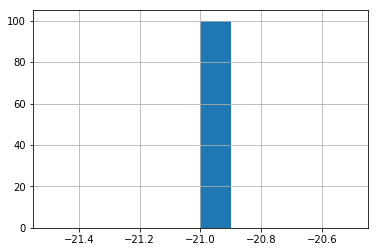

In [16]:
initial.hist()
plt.savefig('{}/initial.pdf'.format(plot_dir))

## Training

In [17]:
agent.observe()

50437frame [00:54, 919.58frame/s]                        


In [18]:
callback = BaseCallback()

In [19]:
agent.train(callback=callback)

 98%|█████████▊| 9840098/10000000 [17:13:04<17:04, 156.01frame/s, loss=0.0692, score=20]   

KeyboardInterrupt: 

In [20]:
# save the training results
scores = pd.Series(callback.scores)
scores.to_csv('{}/scores.csv'.format(exp_directory))
losses = pd.Series(callback.losses)
losses.to_csv('{}/losses.csv'.format(exp_directory))

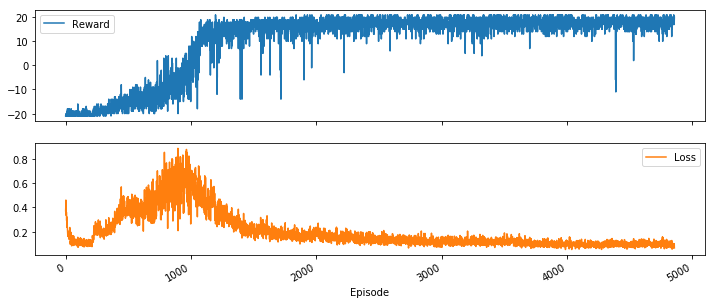

In [21]:
train = pd.concat([scores, losses], axis=1)
train.columns = ['Reward', 'Loss']
train.index.name = 'Episode'
_ = train.plot(figsize=(12, 5), subplots=True)
plt.savefig('{}/training.pdf'.format(plot_dir))

## Final

In [23]:
final = agent.play()
final = pd.Series(final)
final


100%|██████████| 100/100 [08:06<00:00,  4.87s/game]


0     20.0
1     20.0
2     20.0
3     19.0
4     18.0
5     21.0
6     20.0
7     21.0
8     19.0
9     15.0
10    15.0
11    20.0
12    21.0
13    20.0
14    19.0
15    21.0
16    21.0
17    17.0
18    20.0
19    17.0
20    19.0
21    20.0
22    20.0
23    20.0
24    20.0
25    21.0
26    21.0
27    20.0
28    20.0
29    20.0
      ... 
70    18.0
71    19.0
72    19.0
73    21.0
74    20.0
75    21.0
76    20.0
77    20.0
78    21.0
79    20.0
80    17.0
81    19.0
82    19.0
83    18.0
84    19.0
85    21.0
86    18.0
87    18.0
88    19.0
89    20.0
90    20.0
91    18.0
92    19.0
93    20.0
94    20.0
95    20.0
96    19.0
97    19.0
98    20.0
99    21.0
Length: 100, dtype: float64

In [24]:
final.to_csv('{}/final.csv'.format(exp_directory))

In [25]:
final.describe()

count    100.000000
mean      19.640000
std        1.314411
min       15.000000
25%       19.000000
50%       20.000000
75%       21.000000
max       21.000000
dtype: float64

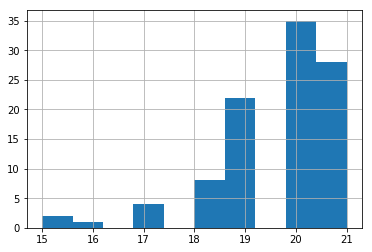

In [26]:
final.hist()
plt.savefig('{}/final.pdf'.format(plot_dir))

## Saving Weights

In [27]:
agent.model.save_weights('{}/weights.h5'.format(exp_directory), overwrite=True)